In [ ]:
# AUTHOR: Nishant Borude (nborude@cs.stonybrook.edu)
# Task: Analysis of Ransomware attacks and Crypto-Currency

In [26]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
plt.style.use("fivethirtyeight")

### Wald's Test for 2 Population definition

In [27]:
def wald(X, Y):
    p1_hat = sum(X) / len(X)
    p2_hat = sum(Y) / len(Y)
    t_sum = 0
    for i in X:
        t_sum += (i - p1_hat)**2
    var_1 = t_sum / len(X)
    t_sum = 0
    for i in Y:
        t_sum += (i - p2_hat)**2
    var_2 = t_sum / len(Y)
    w = abs((p1_hat - p2_hat) / np.sqrt((var_1/ len(X)) + (var_2 / len(Y))))
    print("Wald's Value: ", w)
    if w > 1.96:
        print('Reject Null')
    else:
        print('Accept Null')
    return (p1_hat - p2_hat), np.sqrt((var_1/ len(X)) + (var_2 / len(Y))), w

### Bayesian Inference function

In [106]:
def funct(sigma, data):
    a = 0
    b_2 = 1
    a_list = []
    b_list = []
    se_2 = (sigma**2) / data.shape[1]
    
    for i in range(data.shape[0]):
        pos_data = data.iloc[i, :]
        X_bar = np.mean(pos_data)
        x = (b_2 * X_bar + se_2 * a) / (b_2 + se_2)
        y_2 = (b_2 * se_2) / (b_2 + se_2)
        a = x
        b_2 = y_2
        a_list.append(a)
        b_list.append(b_2)

#     plt.figure(figsize=(20,10))
    for i in range(len(a_list)):
        mu = a_list[i]
        variance = b_list[i]
        sigma = np.sqrt(variance)
        x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
        plt.plot(x,mlab.normpdf(x, mu, sigma))
    
    leg_list= []
    for i in range(len(a_list)):
        leg_list.append('Mean {:.2g}, Var {:.2g}'.format(a_list[i], b_list[i]))
    
    plt.legend(leg_list, prop={'size': 10})
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.title("Posterior Plot", fontsize = 12)
    plt.xlabel("Distribution", fontsize = 12)
    plt.ylabel("Value", fontsize = 12)
    plt.savefig('a.jpg', bbox_inches='tight')
    plt.show()
    
    d = pd.DataFrame()
    d[0] = a_list
    d[1] = b_list
    d.columns = ['Mean', 'Variance']
    return d

### Plot functions for different graphs

In [29]:
def plot(pred, test):
    plt.figure(figsize=(20,10))
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.title("Prediction vs Actual data", fontsize = 15)
    plt.xlabel("Point", fontsize = 15)
    plt.ylabel("Value", fontsize = 15)
    test = list(test.reshape(-1))
    plt.plot(pred)
    plt.plot(test)
    plt.legend(['Prediction', 'Actual'], prop={'size': 15})
    plt.savefig('a.jpg', bbox_inches='tight', pad_inches = 1)
    plt.show()

In [74]:
def plot(x_data):
    plt.title("Distribution", fontsize= 12)
    plt.xlabel("Time", fontsize= 12)
    plt.ylabel("Value", fontsize= 12)
    plt.plot(x_data)
    plt.legend(['Actual'])
    plt.savefig('gauss.jpg', bbox_inches='tight')
    plt.show()

### Bitcoin and ransomware dataset reading and formatting

In [31]:
bitcoin = pd.read_csv("dataset/bitcoin_dataset.csv")
bitcoin_price = pd.read_csv("dataset/bitcoin_price.csv")
ran_new = pd.read_csv("ransomware.csv", sep= ",")
ransomware = pd.read_csv("ransomware_data.csv", sep= ",", header=None, names=["Date", "R", "R1", "R2"])

In [32]:
ran_new["Year"] = pd.to_datetime(ran_new["Date"]).dt.year
ran_new["Month"] = pd.to_datetime(ran_new["Date"]).dt.month
ran_new = ran_new.drop(["Date"],axis = 1)
# df["Year"] = pd.to_datetime(df["Date"]).dt.year
# df["Month"] = pd.to_datetime(df["Date"]).dt.month

In [33]:
df = pd.DataFrame(pd.to_datetime(ransomware["Date"]).value_counts())
df = df.reset_index()
df = df.rename(index=str, columns={"Date": "Count", "index": "Date"})

In [34]:
df["Year"] = pd.to_datetime(df["Date"]).dt.year
df["Month"] = pd.to_datetime(df["Date"]).dt.month
count_frame = df.drop(["Date"],axis = 1)

In [35]:
count_frame = pd.concat([count_frame, ran_new], axis = 0)
# count_frame

In [53]:
data = bitcoin[["Date", "btc_cost_per_transaction"]]
data["Year"]= pd.to_datetime(data["Date"]).dt.year
data["Month"] = pd.to_datetime(data["Date"]).dt.month

/home/nishant/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/nishant/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [54]:
monthlyAvg = data.groupby(['Year', 'Month']).mean()
mAvg_BTC = monthlyAvg.reset_index()

In [55]:
data_set = pd.merge(mAvg_BTC, count_frame,  how='right', left_on=['Year','Month'], right_on = ['Year','Month'])

In [56]:
data_set.drop_duplicates(inplace=True)
data_set = data_set.drop([16])

In [58]:
X_arr = np.asarray(data_set.btc_cost_per_transaction)
Y_arr = np.asarray(data_set.Count)
X_arr = X_arr / max(X_arr)
Y_arr = Y_arr / max(Y_arr)

In [59]:
data_set

,Year,Month,btc_cost_per_transaction,Count
0,2015,1,10.183137,3
1,2015,2,9.362225,1
2,2015,3,10.114512,4
3,2015,4,7.893575,3
4,2015,5,8.336469,4
5,2015,6,7.563553,1
6,2015,7,7.873976,1
7,2015,8,8.287539,5
8,2015,9,6.544047,1
9,2015,10,7.187905,2


### Wald's two population test for comparing the two lists

In [60]:
delta, se, w = wald(X_arr, Y_arr)
print("p_value", 2 * norm.cdf(-w))

# 95% CI
lower = delta + 1.96*se
upper = delta - 1.96*se
print("Confidence Interval = [{}, {}]".format(upper, lower))

Wald's Value:  0.5581626649782704
Accept Null
p_value 0.5767333126858334
Confidence Interval = [-0.07965964387185412, 0.1430950197231398]


In [62]:
X = ["Jan 2015", "Feb 2015", "Mar 2015", "Apr 2015", "May 2015", "June 2015", "July 2015", "Aug 2015", "Sep 2015", "Oct 2015", "Nov 2015", "Dec 2015", "Jan 2016", "Feb 2016", "Mar 2016", "Apr 2016", "May 2016", "June 2016", "July 2016", "Aug 2016", "Sep 2016", "Oct 2016", "Nov 2016", "Dec 2016", "Jan 2017", "Feb 2017", "Mar 2017", "Apr 2017", "May 2017", "June 2017", "July 2017"]

### Parametric Inference for Gaussian Distribution

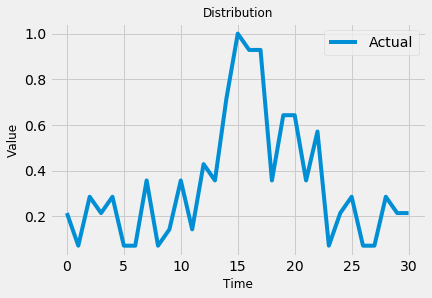

In [76]:
plot(Y_arr)

MLE parameters: mu = 0.34331797235023037, sigma = 0.2656673034864736


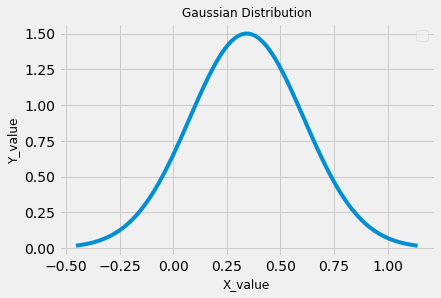

In [94]:
mu_mle = np.mean(Y_arr)
sigma_mle = np.sqrt(np.var(Y_arr))
print("MLE parameters: mu = {}, sigma = {}".format(mu_mle, sigma_mle))

plt.title("Gaussian Distribution", fontsize= 12)
plt.xlabel("X_value", fontsize= 12)
plt.ylabel("Y_value", fontsize= 12)
plt.legend(['PDF'])
x = np.linspace(mu_mle - 3*sigma_mle, mu_mle + 3*sigma_mle, 100)
plt.plot(x,mlab.normpdf(x, mu_mle, sigma_mle))

plt.show()

### Bayesian Inference

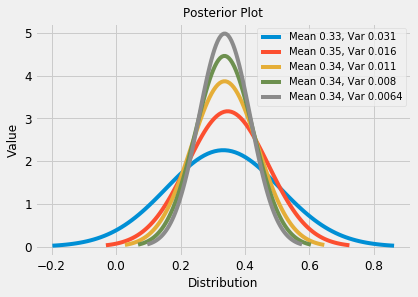

,Mean,Variance
0,0.332589,0.031250
1,0.346318,0.015873
2,0.336853,0.010638
3,0.336445,0.008000
4,0.336875,0.006410


In [110]:
t0 = pd.DataFrame(Y_arr).transpose()
# t1 = pd.DataFrame(X_arr).transpose()
# t2 = pd.DataFrame(X_arr).transpose()
# t3 = pd.DataFrame(X_arr).transpose()
# t = pd.DataFrame(X_arr).transpose()
t1 = pd.DataFrame(np.random.normal(mu_mle, sigma_mle, 31)).transpose()
t2 = pd.DataFrame(np.random.normal(mu_mle, sigma_mle, 31)).transpose()
t3 = pd.DataFrame(np.random.normal(mu_mle, sigma_mle, 31)).transpose()
t4 = pd.DataFrame(np.random.normal(mu_mle, sigma_mle, 31)).transpose()

X_plt_data = pd.DataFrame()
X_plt_data = X_plt_data.append([t0, t1, t2, t3, t4])


funct(1, X_plt_data)